### Name: Yi Jie Lim
### Student Number: 20104720

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.style as style # Change the plot style used for graphs
style.use('seaborn')

<ipython-input-2-16368847e6cd>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


# Python Workbook 8 - Further Applications of Integration

* In this workbook we will use __sympy__ and __numpy__ to examine more properties of definite integrals of the form $\int_a^bf(x)dx$.


* We will cover the following topics:

  1. The average of a function.

  2. The Root Mean Square (RMS) of a function.

  3. Numerical integration of functions.


---
---






# Section 1:  Average Values of Functions

* In this work book we will use the integral to evaluate the average value of some function $f(x)$, over some interval $a\leq x\leq b$.

---
## __Definition: The Average of a function__
* Given an function $f(x)$ and an interval $X=[a,b]$, then the average of $f(x)$ over this interval is given by
$$
\bar{f} = \frac{1}{b-a}\int_{a}^{b}f(x)dx
$$


* This defition basically means add $f(x)$ up for each value of $x\in[a,b]$ which is given by the integral
$$
\int_{a}^{b}f(x)dx,
$$
while multiplying by $\frac{1}{b-a}$ means __dividing__ this sum by the __length__ of $[a,b]$, which is simply the distance between the end-points, i.e. $b-a$.

---

## Example 1:

Given the function
$$
f(t)=t^{3}-8t^{2}+t+75
$$
answer the following:


1. Plot the function f(t) over the interval $-5\leq t\leq 5$.


2. From the plot, determine if the function is __mostly positive__ or __mostly negative__.


3. Determine the average value of the function.


4. Does this agree with your observation in Part 2.

### Part 1:
First we must create a symbolic variable for $t$, and then define the function $f(t)$.

In [3]:
t=sym.symbols('t')

In [4]:
f=t**3-8*t**2+t+75
f

t**3 - 8*t**2 + t + 75

* Now we can plot the function $f(t)$ over the interval $T=[-5, 5]$.

* To do that, we __lambdify__ $f(t)$ in the usual way, and use  __np.linspace()__ to define the plot interval:

In [5]:
F=sym.lambdify(t,f,'numpy')

In [6]:
T=np.linspace(-5,5,501)

* Now we can plot __F__ on the linspace __T:__

(-5.0, 5.0)

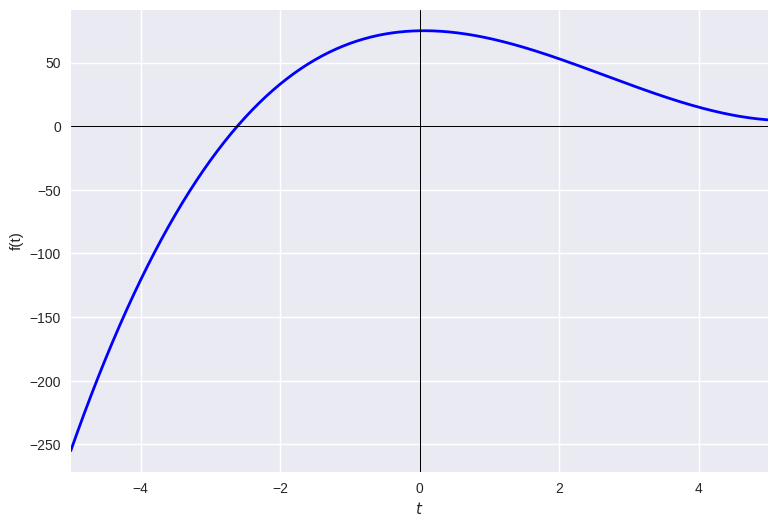

In [7]:
plt.figure(figsize=(9,6))

plt.plot(T,F(T),lw=2,c='blue',label='$f(t)$')

plt.axhline(y=0,lw=0.75,c='k')
plt.axvline(x=0,lw=0.75,c='k')

plt.xlabel('$t$')
plt.ylabel('f(t)')

plt.xlim(-5,5)

### Part 2:
* From the graph it appears the function is __mostly potitive__, the function is positive over a much larger interval than negative.

* The graph is negative (i.e. below the x-axis) between $t=-5$ and $t\approx-2.5$.

* The graph is positive for $t\gtrsim-2.5$.

* While the graph is very negative below $t\approx-2.5$, it is comparably largely positive over the much larger interval $-2.5\lesssim t\leq 5$.

* For this reason we say the grapg of $f(t)$ is mostly positive over the interval $T=[-5,5]$.

### Part 3:

* We can make this statement more rigorous by calculating the average of $f(t)$ over the interval $T$.

* First we give the __general definition__ of the __average__ of some function $f(x)$ over an interval $[a,b]=a\leq x\leq b$

__DEFINTITION:__




$$
\bar{f}=\frac{1}{5-(-5)}\int_{-5}^{5}f(t)dt=\frac{1}{10}\int_{-5}^{5}f(t)dt.
$$



In [8]:
a=-5
b=5
f_bar=(1/(b-a))*sym.integrate(f,(t,a,b))
f_bar

8.33333333333333

### Part 4:

Since the function is mostly positive over the interval $-5\leq t\leq 5$, the average value of the function should be positive over this interval.

## Exercise 1:

The temperature $h$ (measureed in $^{\circ}$C) at time $t$ is given by
$$
h(t)=0.001t^{4}-0.28t^{2}+25
$$
where $t$ is the number of hours from __noon__.

Using this, answer the following:

1. Plot the function h(t) over the interval $0\leq t\leq 12$, i.e. between noon and midnight (use __sym.lambdify()__ and __np.linspace()__ to set up the function and interval).



2. From this plot, estimate if the temperature is mostly positive or mostly negative in this interval.



3. Find the average value of the temperature beteween noon and midnight.



4. Does this agree with your observation from Part 2.

In [9]:
t=sym.symbols('t')

In [10]:
h=0.001*t**4-0.28*t**2+25
h

0.001*t**4 - 0.28*t**2 + 25

In [11]:
H=sym.lambdify(t,h,'numpy')

In [12]:
T=np.linspace(0,12,501)

(0.0, 12.0)

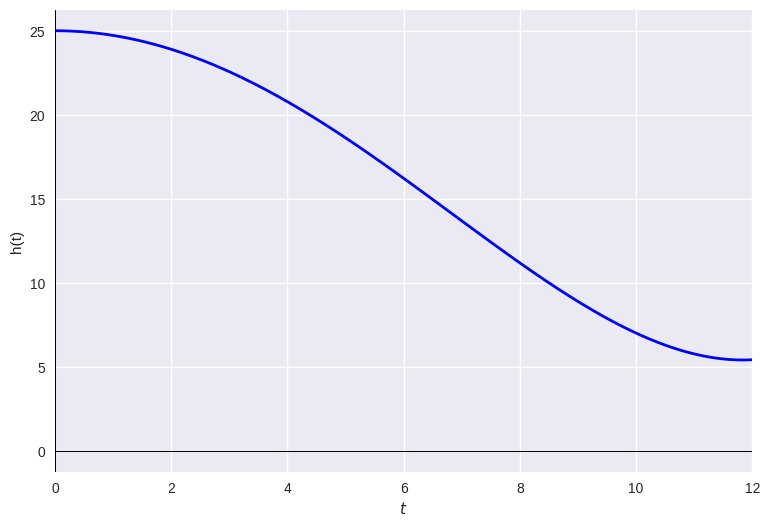

In [13]:
plt.figure(figsize=(9,6))

plt.plot(T,H(T),lw=2,c='blue',label='$h(t)$')

plt.axhline(y=0,lw=0.75,c='k')
plt.axvline(x=0,lw=0.75,c='k')

plt.xlabel('$t$')
plt.ylabel('h(t)')

plt.xlim(0,12)

In [14]:
#Part 2
#the graph of  h(t)  is mostly positive over the interval  T=[0,12] .

In [15]:
a=0
b=12
h_bar=(1/(b-a))*sym.integrate(h,(t,a,b))
h_bar

15.7072000000000

In [16]:
#Since the function is mostly positive over the interval  0≤t≤12 , the average value of the function should be positive over this interval.

---
---

# Section 2:  The Root Mean Square (RMS) of a function


## __Definition:: The RMS of a function__


* Given a function $f(t)$,
the __RMS__ of this function, over the time interval $a\leq t\leq b$ is given by:

$$
RMS(f(t))=\sqrt{\frac{1}{b-a}\int f(t)^2dt}
$$



* This is an important type of average, especially in relation to electronics and elictrical supply, where currents and voltages are often __oscillatory__ funcitons of time.

## Example 2 - RMS of a sinusoid

Given by the function
$$
  g(t) = 400\sin(250\pi t),
$$

answer the following:
1. Plot this function of the time interval $0\leq t\leq 0.016$.
 Is the graph mostly positive of mostly negative?


2. Find the average value of this function over this time interval, as we did in __Exercise 1__.


3. Find the RMS of this over the time interval.


4. Confirm that this RMS is equivalent to $\frac{400}{\sqrt{2}}$

### Part 1:
* First we define $g(t)$ __symbolically__

In [17]:
g=400*sym.sin(250*sym.pi*t)
g

400*sin(250*pi*t)

* Next we __lambdify__ and define the interval $0\leq tleq 0.016$ using __np.linspace()__

In [18]:
G=sym.lambdify(t,g,'numpy')

In [19]:
T=np.linspace(0,0.016,501)

* Now we plot __G__ along __T__ using __matplotlib__



* In other word, half of the area is above the $x$-axis and hald the area is below the $x$-axis.

Text(0, 0.5, 'g(t)')

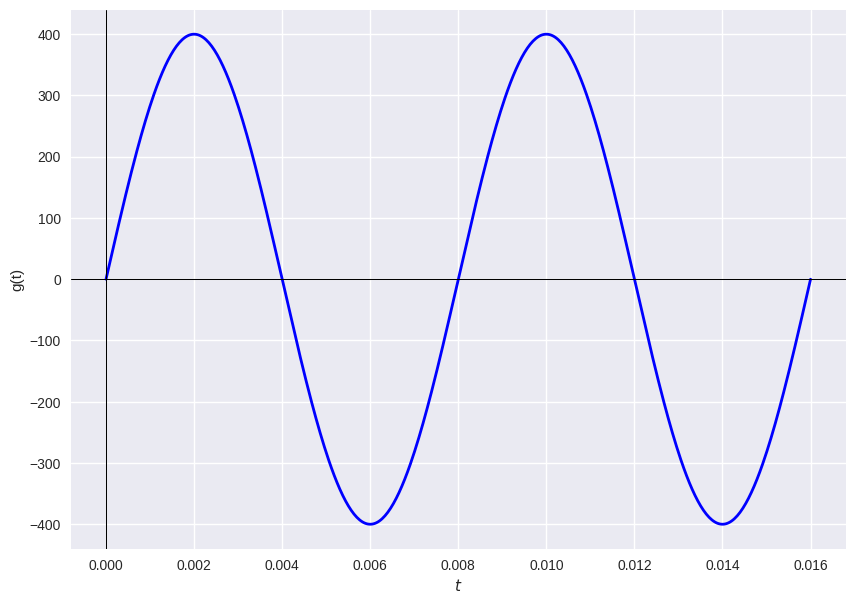

In [20]:
plt.figure(figsize=(10,7))

plt.plot(T,G(T),c='blue',lw=2)

plt.axhline(y=0,lw=0.75,c='k')
plt.axvline(x=0,lw=0.75,c='k')

plt.xlabel('$t$')
plt.ylabel('g(t)')

* From this graph we see the fucntion is positive (above the horizontal) as much as it is negative (below the horizontal).

* This means the function is __neither__ mostly positive or mostly negative.

* It also means the integral of the function over this interval will be exactly zero, since the area below the horizontal cancels with the area above the horizontal.

### Part 2:

* We can calucualte the integral $\frac{1}{0.016-0}\int_{0}^{0.016}g(t)dt$ (i.e. the average of $g(t)$ over the interval) symbolically as follows:

In [21]:
a=0
b=0.016
g_bar=1/(b-a)*sym. integrate(g,(t,a,b))
g_bar

0

* As we can see, the average of the function over this interval is exactly zero.

* Another way of sayning this is the __area above__  exactly __cancels__ the __area below__ the horizontal.

### Part 3

* We find the __RMS__ of the function as follows:

In [22]:
a=0
b=0.016
RMS_g=sym.sqrt((1.0/(b-a))*sym.integrate(g**2,(t,a,b)))
RMS_g

282.842712474619

### Part 4

* Comparing with $\frac{400}{\sqrt{2}}$ find:

In [23]:
sym.N(400/sym.sqrt(2))==sym.sqrt((1.0/(b-a))*sym.integrate(g**2,(t,a,b)))

True

#### Reamark on $\text{RMS}(A\sin(kt))$


* When we take the __RMS__ of a function like $A\sin(kt)$ or $A\cos(kt)$, where $A$ and $k$ are conatants, we always end up with the answer $\frac{A}{\sqrt{2}}$.



* This is a general property of the trigonometric functions $\cos$ and $\sin$, and has nothing to do with the values of $A$ or $k$.

## Exercise 2

The electricity voltage delivered to a house in Ireland is given by the function
$$
    V(t) = 220\sin(50t)
$$

1. Plot the function $V(t)$ and from the graph estimate the __mean__ of this voltage over $0<t<\frac{\pi}{25}$.


2. Find the mean value of this voltage over the time interval given.


3. Find the RMS of this voltage of this voltage over the time given.


4. Confirm that this RMS is equal to $\frac{220}{\sqrt{2}}$.

In [24]:
v=220*sym.sin(50*t)
v

220*sin(50*t)

In [25]:
V=sym.lambdify(t,v,'numpy')

In [26]:
T=np.linspace(0,np.pi/25,501)

Text(0, 0.5, 'v(t)')

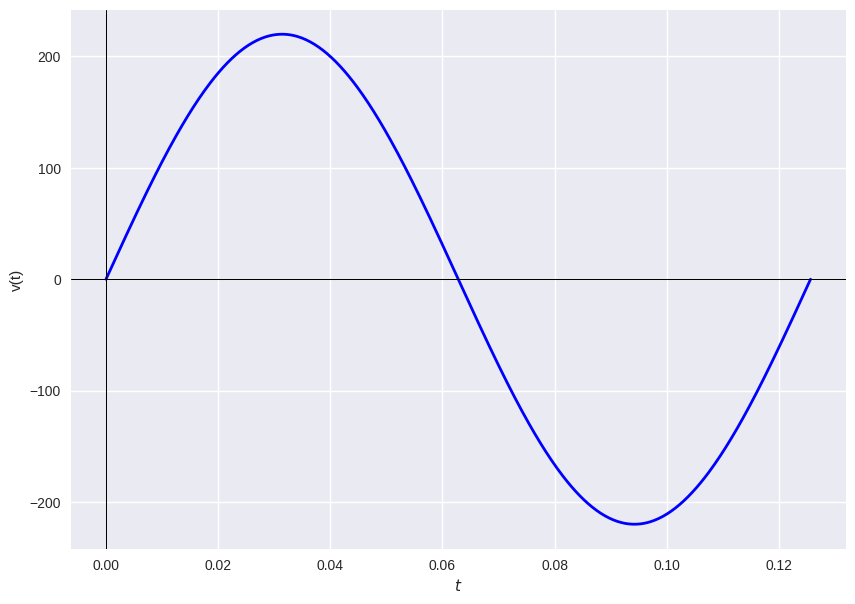

In [28]:
plt.figure(figsize=(10,7))

plt.plot(T,V(T),c='blue',lw=2)

plt.axhline(y=0,lw=0.75,c='k')
plt.axvline(x=0,lw=0.75,c='k')

plt.xlabel('$t$')
plt.ylabel('v(t)')

In [29]:
#From this graph we can see the function is positive as much as it is negative so the mean of this voltage is 0

In [30]:
a=0
b=np.pi/25
v_bar=(1/(b-a))*sym.integrate(v,(t,a,b))
v_bar

0

In [31]:
a=0
b=np.pi/25
RMS_v=sym.sqrt((1.0/(b-a))*sym.integrate(v**2,(t,a,b)))
RMS_v

155.563491861040

In [32]:
sym.N(220/sym.sqrt(2))==sym.sqrt((1.0/(b-a))*sym.integrate(v**2,(t,a,b)))

False

---
---

# Section 3: Numerical Integration - The Trapezoidal Rule

* The integral of a function $f(x)$, over the interval $a\leq x\leq b$, according to the __trapezoidal rule__ is given by


$$
\int_{a}^{b}f(x)dx= \frac{h}{2}[y_0+y_n+2(y_1+y_2+y_3+\ldots+y_{n-1})]
$$


* Here the parameters are given by:
  
  * __$n$__ The number of steps in the integration.

  * __$h$__ The stepsize of the integration, given by $h=\frac{b-a}{n}$

  * __$y_n$__ The value of the function at $x_n=x_0+nh$, i.e. $y_{n}=f(x_n)$


* __NOTE:__ In the rest of this workbook we will be using __numpy__ and __matplotlib__ only, so we can use __def()__ to define our functions from now on.

## Example 3

Integrate the following function, over the interval $X=[0,4]$, using the trapezoidal rule with __n=5__ evaluation points:

$$
    P(x) = 1+x^2.
$$


### Part 1: Define the function

In [33]:
def P(x):
    return 1+x**2

### Part 2: Create the $x$-space for the integral

* Since we are integrating along __X=[0,5]__ using __n=11__ points, we use __np.linspace()__ for the integral as follows:

In [34]:
X5=np.linspace(0,4,5)
X5

array([0., 1., 2., 3., 4.])

### Part 3: Plotting the $P(x)$

* The function evaluated on this __linspace__ is given by

In [35]:
P(X5)

array([ 1.,  2.,  5., 10., 17.])

* This returns the square of each value in the __linspace  X__


* We plot these values as follows

Text(0, 0.5, '$P(x)$')

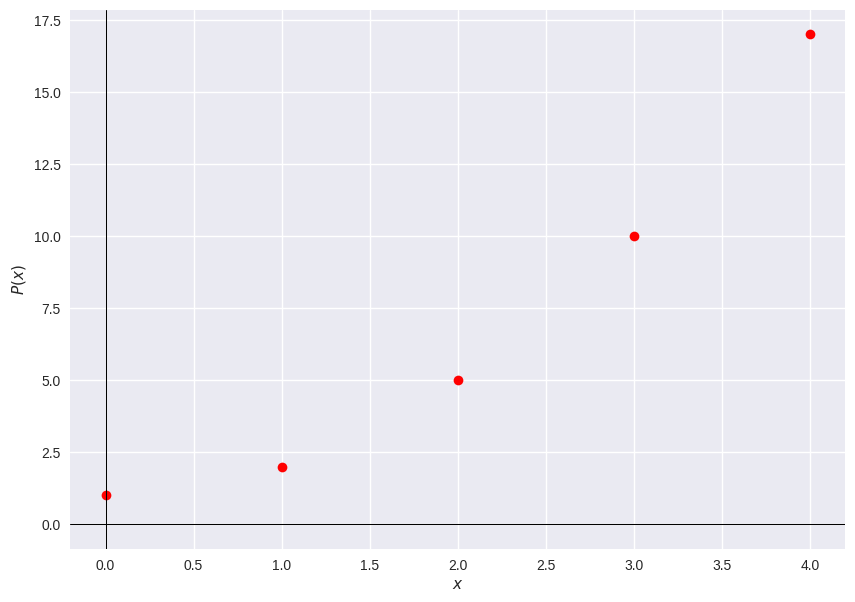

In [36]:
plt.figure(figsize=(10,7))
plt.plot(X5,P(X5),'o',color='red')

plt.axhline(y=0,lw=0.75,c='k')
plt.axvline(x=0,lw=0.75,c='k')

plt.xlabel('$x$')
plt.ylabel('$P(x)$')

* We use __'o'__ in the plot function to indicate we want to use closed dots to represent the data values.



* Other markers include __'+'__, __'v'__, __'s'__, __'d'__ among many others.

## Integrating on the linspace

* Luckily, there is a __NumPy__ function called __np.trapz()__ specifically used to evaluate numerical integrals using the __trapezoidal rule__

* We can integrate __P(X)__ along the linepsace __X__ this using the trapezoidal rule as follows:

In [37]:
np.trapz(P(X5),X5)

26.0

* This gives 2 times each value $X_1$, $X_2$ and $X_3$, while it gives only 1 times the values $X_{0}$ and $X_{4}$. This sum is then mutiplied by  half the stepsize.


* In the figure below we illustrate what we have done graphically:

Text(0, 0.5, '$P(x)$')

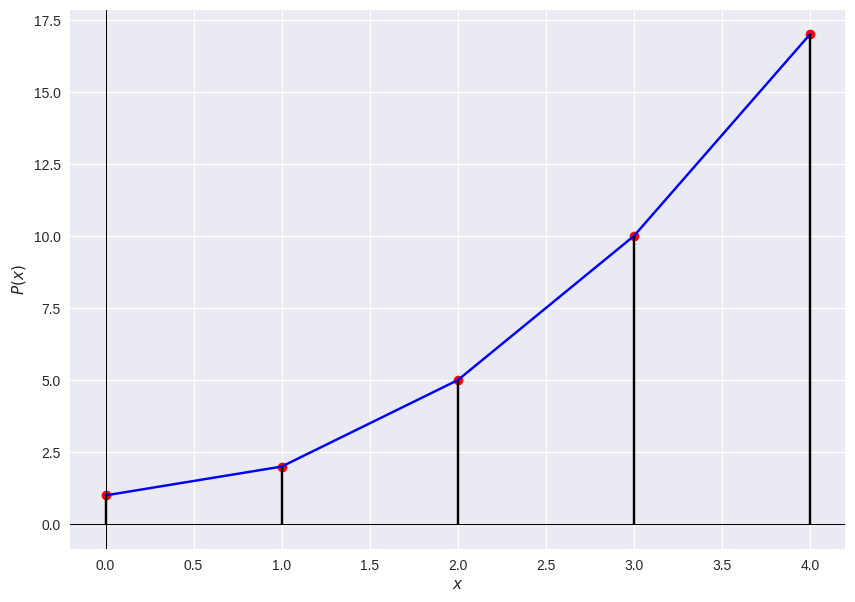

In [38]:
plt.figure(figsize=(10,7))
plt.plot(X5,P(X5),'o',color='red') # Plot the red dots
plt.plot(X5,P(X5),color='b') # Plot the blue connecting lines

plt.vlines(X5,ymin=0,ymax=P(X5),color='k') # Plot the vertical connecting lines

plt.axhline(y=0,lw=0.75,c='k')
plt.axvline(x=0,lw=0.75,c='k')

plt.xlabel('$x$')
plt.ylabel('$P(x)$')

## Interpreting the Trapezoidal Ruel

* What we are doing numerically is calculating the areas of each of the trapezoids shown above.



* The __First Trapezoid__ has heights __P(0)__, __P(1)__ and width __h__ so

$$
\mathrm{Area}_1=h\cdot\frac{P(0)+P(1)}{2}.
$$


* The __Second Trapezoid__ has heights __P(1)__, __P(X[2])__ and width __h__ so
$$
\mathrm{Area}_2=h\cdot\frac{P(X[1])+P(X[2])}{2}.
$$


* The __Third Trapezoid__ has heights __P(X[2])__, __P(X[3])__ and width __h__ so
$$
\mathrm{Area}_3=h\cdot\frac{P(X[2])+P(X[3])}{2}.
$$


* The __Fourth Trapezoid__ has heights __P(X[3])__, __P(X[4])__ and width __h__ so
$$
\mathrm{Area}_4=h\cdot\frac{P(X[3])+P(X[4])}{2}.
$$


* Hence the __total area__ is just the sum of these areas, given by
$$
\begin{aligned}
\mathrm{Area}&=\frac{h}{2}\left[P(X[0])+2P(X[1])+2P(X[2])+2P(X[3])+P(X[4])\right]\\
             &=\frac{h}{2}\left[2\{P(X[0])+P(X[1])+P(X[2])+P(X[3])+P(X[3])+P(X[4])\}-P(X[0])-P(X[4])\right]\\
             &=\frac{h}{2}\left[2\Sigma(P(X))-P(X[0])-P(X[4])\right].
\end{aligned}
$$


## Improving the answer

* The smaller we make the step size __h__, or equivalently, the larger we make **n**, then the better our answer will be.


* To see this, we evaluate the same integral using __n=51__ evaluation points:

In [39]:
X51=np.linspace(0,4,51)

In [40]:
P(X51)

array([ 1.    ,  1.0064,  1.0256,  1.0576,  1.1024,  1.16  ,  1.2304,
        1.3136,  1.4096,  1.5184,  1.64  ,  1.7744,  1.9216,  2.0816,
        2.2544,  2.44  ,  2.6384,  2.8496,  3.0736,  3.3104,  3.56  ,
        3.8224,  4.0976,  4.3856,  4.6864,  5.    ,  5.3264,  5.6656,
        6.0176,  6.3824,  6.76  ,  7.1504,  7.5536,  7.9696,  8.3984,
        8.84  ,  9.2944,  9.7616, 10.2416, 10.7344, 11.24  , 11.7584,
       12.2896, 12.8336, 13.3904, 13.96  , 14.5424, 15.1376, 15.7456,
       16.3664, 17.    ])

Text(0, 0.5, '$P(x)$')

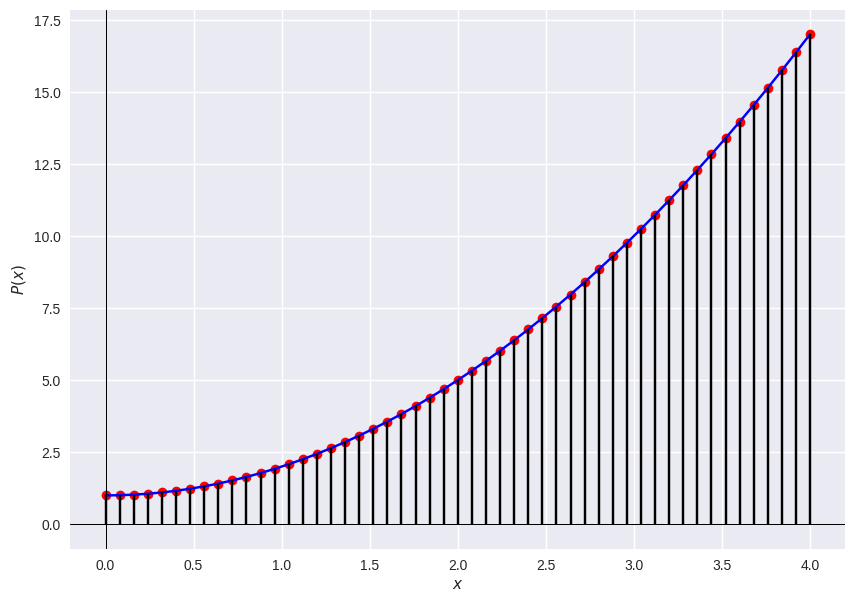

In [41]:
plt.figure(figsize=(10,7))
plt.plot(X51,P(X51),'o',color='red') # Plot the red dots
plt.plot(X51,P(X51),color='b') # Plot the blue connecting lines

plt.vlines(X51,ymin=0,ymax=P(X51),color='k') # Plot the vertical connecting lines

plt.axhline(y=0,lw=0.75,c='k')
plt.axvline(x=0,lw=0.75,c='k')

plt.xlabel('$x$')
plt.ylabel('$P(x)$')

* The trapesoidal rule gives the area above as follows:

In [42]:
np.trapz(P(X51),X51)

25.337600000000002

## The exact answer

* Since the function is simple to integrate in this case, we can also get an exact answer symbolically.


* The exact answer we seek is:

In [43]:
x=sym.symbols('x')
sym.integrate(1+x**2,(x,0,4)).evalf()

25.3333333333333

* It is clear that with __n=51__ then the answer we get is fairly accurate.

* If we make __n__ even bigger then we will get an even more accuarte answer.

## Exercise 3

Integrate the following function, over the interval $0\leq x\leq 2\pi$, using the methods given below:

$$
    Q(r) = \sin(r^2)
$$

1. Integrate using the trapezoidal rule with $n=15$.


2. Integrate using the trapezoidal rule with $n=75$.


3. Create __two__ plots to represent __both__ of these numerical integrals.

In [44]:
def Q(r):
  return np.sin(r**2)

In [45]:
R15=np.linspace(0,2*np.pi,15)
R15

array([0.        , 0.44879895, 0.8975979 , 1.34639685, 1.7951958 ,
       2.24399475, 2.6927937 , 3.14159265, 3.5903916 , 4.03919055,
       4.48798951, 4.93678846, 5.38558741, 5.83438636, 6.28318531])

In [46]:
Q(R15)

array([ 0.        ,  0.20006131,  0.72130317,  0.97086347, -0.08104633,
       -0.94824825,  0.8237266 , -0.43030122,  0.31887402, -0.57048567,
        0.96152318, -0.68954525, -0.66703194,  0.49466996,  0.97834055])

In [47]:
np.trapz(Q(R15),R15)

0.7151760895936676

Text(0, 0.5, '$Q(r)$')

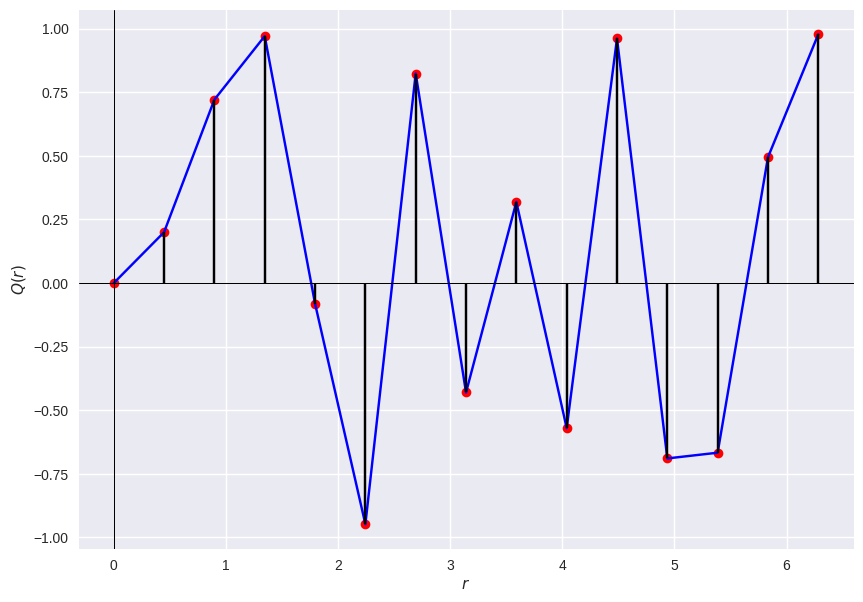

In [48]:
plt.figure(figsize=(10,7))
plt.plot(R15,Q(R15),'o',color='red') # Plot the red dots
plt.plot(R15,Q(R15),color='b') # Plot the blue connecting lines

plt.vlines(R15,ymin=0,ymax=Q(R15),color='k') # Plot the vertical connecting lines

plt.axhline(y=0,lw=0.75,c='k')
plt.axvline(x=0,lw=0.75,c='k')

plt.xlabel('$r$')
plt.ylabel('$Q(r)$')

In [49]:
R75=np.linspace(0,2*np.pi,75)

In [50]:
Q(R75)

array([ 0.        ,  0.00720929,  0.02883342,  0.06483866,  0.11509402,
        0.17925962,  0.25663281,  0.34595674,  0.44520089,  0.55133002,
        0.66008756,  0.76583042,  0.86146464,  0.93854165,  0.98758119,
        0.99868403,  0.96248001,  0.87141995,  0.72135876,  0.51329191,
        0.25500359, -0.03772311, -0.34076854, -0.62267379, -0.84736049,
       -0.97874566, -0.98704603, -0.85604384, -0.58999486, -0.21834609,
        0.20379477,  0.60120086,  0.89084069,  0.99999551,  0.88698081,
        0.55911701,  0.08136629, -0.43030122, -0.83356384, -0.99954558,
       -0.8580218 , -0.43266622,  0.15035591,  0.69161543,  0.98386887,
        0.89526393,  0.43763983, -0.21578699, -0.78480802, -0.99952272,
       -0.73534333, -0.09787157,  0.60082669,  0.98570643,  0.82413592,
        0.18183814, -0.57890306, -0.99038873, -0.77104296, -0.03697464,
        0.73177995,  0.99251049,  0.53252466, -0.33309921, -0.95060414,
       -0.81712716, -0.01198412,  0.81158475,  0.93960365,  0.23

Text(0, 0.5, '$Q(r)$')

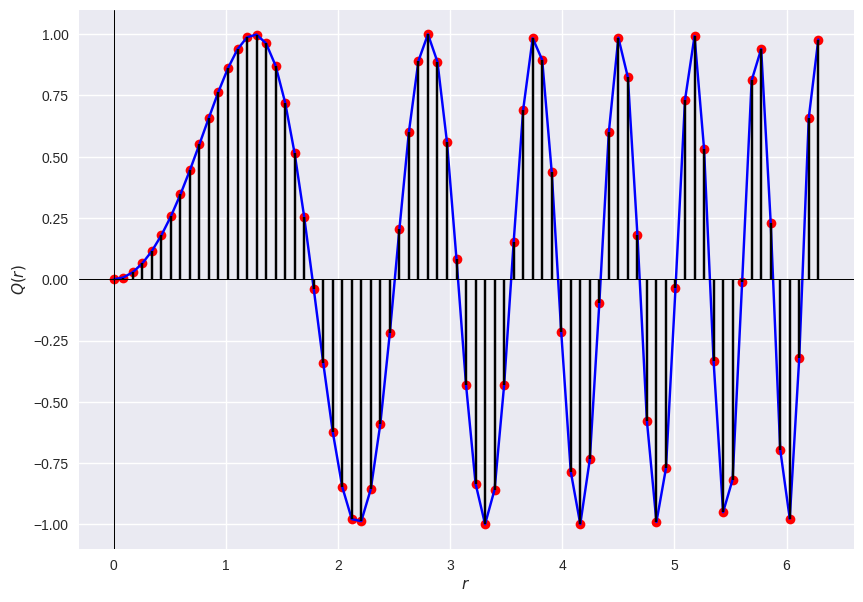

In [51]:
plt.figure(figsize=(10,7))
plt.plot(R75,Q(R75),'o',color='red') # Plot the red dots
plt.plot(R75,Q(R75),color='b') # Plot the blue connecting lines

plt.vlines(R75,ymin=0,ymax=Q(R75),color='k') # Plot the vertical connecting lines

plt.axhline(y=0,lw=0.75,c='k')
plt.axvline(x=0,lw=0.75,c='k')

plt.xlabel('$r$')
plt.ylabel('$Q(r)$')

## Exercise 4

Integrate the following function, over the interval $0\leq r\leq 2\pi$, using the methods given below:

$$
    G(r) = \exp(0.25\cos(r))
$$

1. Integrate using the function __np.trapz()__ with $n=35$.


2. Integrate using the function __np.trapz()__ with $n=201$.


3. Create a plot to illustrate the trapezoidal sum in the case $n=35$.

In [52]:
def G(r):
  return np.exp(0.25*np.cos(r))

In [53]:
R35=np.linspace(0,2*np.pi,35)
R35

array([0.        , 0.18479957, 0.36959914, 0.5543987 , 0.73919827,
       0.92399784, 1.10879741, 1.29359698, 1.47839654, 1.66319611,
       1.84799568, 2.03279525, 2.21759481, 2.40239438, 2.58719395,
       2.77199352, 2.95679309, 3.14159265, 3.32639222, 3.51119179,
       3.69599136, 3.88079093, 4.06559049, 4.25039006, 4.43518963,
       4.6199892 , 4.80478876, 4.98958833, 5.1743879 , 5.35918747,
       5.54398704, 5.7287866 , 5.91358617, 6.09838574, 6.28318531])

In [54]:
G(R35)

array([1.28402542, 1.27857129, 1.26253052, 1.23683325, 1.20292035,
       1.16259975, 1.11788062, 1.0708104 , 1.02333519, 0.97719692,
       0.93387214, 0.8945499 , 0.86014125, 0.83131023, 0.80851643,
       0.79206006, 0.78212299, 0.77880078, 0.78212299, 0.79206006,
       0.80851643, 0.83131023, 0.86014125, 0.8945499 , 0.93387214,
       0.97719692, 1.02333519, 1.0708104 , 1.11788062, 1.16259975,
       1.20292035, 1.23683325, 1.26253052, 1.27857129, 1.28402542])

In [55]:
R201=np.linspace(0,2*np.pi,201)
R201

array([0.        , 0.03141593, 0.06283185, 0.09424778, 0.12566371,
       0.15707963, 0.18849556, 0.21991149, 0.25132741, 0.28274334,
       0.31415927, 0.34557519, 0.37699112, 0.40840704, 0.43982297,
       0.4712389 , 0.50265482, 0.53407075, 0.56548668, 0.5969026 ,
       0.62831853, 0.65973446, 0.69115038, 0.72256631, 0.75398224,
       0.78539816, 0.81681409, 0.84823002, 0.87964594, 0.91106187,
       0.9424778 , 0.97389372, 1.00530965, 1.03672558, 1.0681415 ,
       1.09955743, 1.13097336, 1.16238928, 1.19380521, 1.22522113,
       1.25663706, 1.28805299, 1.31946891, 1.35088484, 1.38230077,
       1.41371669, 1.44513262, 1.47654855, 1.50796447, 1.5393804 ,
       1.57079633, 1.60221225, 1.63362818, 1.66504411, 1.69646003,
       1.72787596, 1.75929189, 1.79070781, 1.82212374, 1.85353967,
       1.88495559, 1.91637152, 1.94778745, 1.97920337, 2.0106193 ,
       2.04203522, 2.07345115, 2.10486708, 2.136283  , 2.16769893,
       2.19911486, 2.23053078, 2.26194671, 2.29336264, 2.32477

In [56]:
G(R201)

array([1.28402542, 1.28386703, 1.28339214, 1.28260157, 1.28149668,
       1.28007937, 1.27835208, 1.27631777, 1.27397991, 1.27134249,
       1.26840998, 1.26518732, 1.26167994, 1.2578937 , 1.25383489,
       1.2495102 , 1.24492672, 1.24009192, 1.2350136 , 1.22969988,
       1.22415921, 1.21840028, 1.21243206, 1.20626374, 1.19990472,
       1.19336458, 1.18665304, 1.17977998, 1.17275537, 1.16558926,
       1.15829178, 1.15087307, 1.14334331, 1.13571267, 1.12799128,
       1.12018923, 1.11231655, 1.10438318, 1.09639896, 1.08837361,
       1.08031671, 1.0722377 , 1.06414586, 1.05605029, 1.04795991,
       1.03988343, 1.03182936, 1.02380602, 1.01582148, 1.0078836 ,
       1.        , 0.99217806, 0.98442494, 0.97674753, 0.96915249,
       0.96164625, 0.95423498, 0.9469246 , 0.9397208 , 0.93262902,
       0.92565448, 0.91880214, 0.91207675, 0.90548282, 0.89902465,
       0.89270632, 0.88653168, 0.8805044 , 0.87462794, 0.86890555,
       0.86334033, 0.85793515, 0.85269275, 0.84761567, 0.84270

Text(0, 0.5, '$G(r)$')

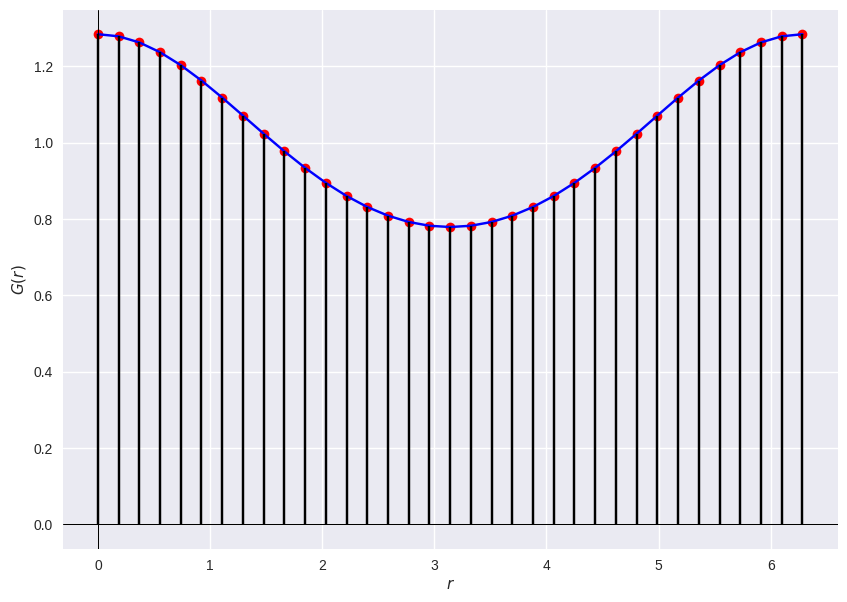

In [57]:
plt.figure(figsize=(10,7))
plt.plot(R35,G(R35),'o',color='red') # Plot the red dots
plt.plot(R35,G(R35),color='b') # Plot the blue connecting lines

plt.vlines(R35,ymin=0,ymax=G(R35),color='k') # Plot the vertical connecting lines

plt.axhline(y=0,lw=0.75,c='k')
plt.axvline(x=0,lw=0.75,c='k')

plt.xlabel('$r$')
plt.ylabel('$G(r)$')